## Data Science Competition 2019 
#### coding by glee1228@naver.com


### Colab 연동하기

In [76]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Google Drive is already mounted



### 한글폰트 설정하기

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


In [250]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 47
nanum_font number: 31


In [279]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.7
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 12.0


In [280]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
# 우선 fm._rebuild() 를 해주면 이제 준비가 완료되었다.
fm._rebuild()

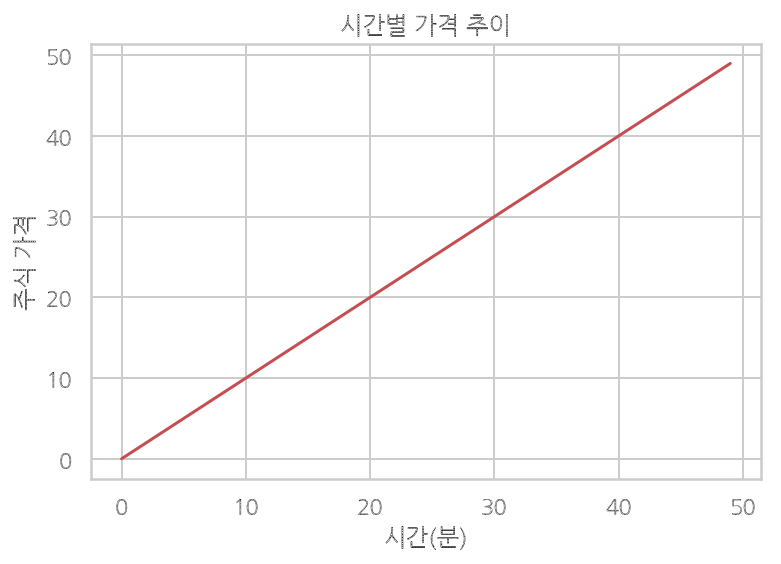

In [282]:
# 그려보자
plt.plot(range(50), range(50), 'r')
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

### 데이터 확인하기

In [254]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv
st_data_goldForeign.tsv    st_data_koreaIndex.tsv


### 학습데이터 로딩

In [255]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
    
# 학습데이터 로딩
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')

goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 시각화 라이브러리 import

In [256]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [257]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


## 우선 금(Gold) 과 유가(Oil) , 원자재(Goods) 위주로 확인해보자! 
st_data_goldKorea.tsv

st_data_oilKorea.tsv

st_data_goldForeign.tsv

st_data_oilForeign.tsv

st_data_goodsForeign.tsv


** 주가 데이터 670000 rows 따라서, 마지막에 확인해보자 **

In [258]:
print(goldKorea.head(3))
print(goldForeign.head(3))
print(oilKorea.head(3))
print(oilForeign.head(3))
print(goodsForeign.head(3))

       date  deal_val  change_val  change_rate   buy_val  sell_val  \
0  20150107  43037.95      220.23      0.51434  45189.84  40886.06   
1  20150113  43276.83      641.66      1.50500  45440.67  41112.99   
2  20150116  43593.24      919.74      2.15530  45772.90  41413.58   

   deposit_val  withdraw_val  international_val  usd_rate  
0     43468.32      42607.58            1214.85    1102.0  
1     43709.59      42844.07            1242.45    1083.5  
2     44029.17      43157.31            1257.92    1078.0  
  itemcode itemname      date  close_val  change_val  open_val  high_val  \
0   COM@GC     국제 금  20150107     1210.6        -8.7    1219.2    1219.2   
1   COM@GC     국제 금  20150113     1234.3         1.6    1239.2    1239.3   
2   COM@GC     국제 금  20150116     1276.9        12.2    1256.1    1279.7   

   low_val  
0   1210.6  
1   1230.3  
2   1256.1  
       date  close_val  change_val  change_rate itemname
0  20150101    1586.62       -5.36        -0.34      휘발유
1  20150

In [259]:
print(goldKorea.info())
print(goldForeign.info())
print(goodsForeign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null int64
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null float64
dtypes: float64(9), int64(1)
memory usage: 25.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null int64
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: float64(5), int64(1), o

In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('Datetime으로 type이 이미 변환되었습니다.')
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])


def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

def getItemCodes(df):
  return df['itemcode'].unique()

def getItemNames(df):
  return df['itemname'].unique()

def getCodeNames(df):
  codes = getItemCodes(df)
  names = getItemNames(df)
  return zip(codes,names)

def getGraph(df,colName):
  dummy=setDateIndex(df)
  code = getItemCodes(dummy)
  name = getItemNames(dummy)
  print('{}({})'.format(name[0],code[0]))
  end_date = dummy.index[-1] + datetime.timedelta(days=10)
  plt.plot(dummy.index,dummy[colName],label=name)
  plt.text(end_date, dummy[colName][-1], str(name[0]), weight = 'bold', fontsize=12)
  plt.xlabel(dummy.index.name)
  plt.ylabel(colName)
    

In [309]:
# Date (Int) -> Date(DateTime)
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.
Datetime으로 type이 이미 변환되었습니다.


In [310]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


In [311]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


In [312]:
print(goodsForeign['itemcode'].unique())
print(goodsForeign['itemname'].unique())

['LME@AAY' 'CBT$BO' 'CBT$C' 'LME@CDY' 'NYM@HO' 'LME@NDY' 'NYM@NG'
 'LME@PDY' 'CBT$RR' 'CBT$S' 'NYB@SB' 'LME@SDY' 'CBT$SM' 'CBT$W' 'LME@ZDY']
['알루미늄합금' '대두유' '옥수수' '구리' '난방유' '니켈' '천연가스' '납' '쌀' '대두' '설탕' '주석' '대두박'
 '소맥' '아연']


In [0]:
gGoldForeign=goldForeign.groupby(goldForeign['itemcode'])
gOilForeign=oilForeign.groupby(oilForeign['itemcode'])
gGoodsForeign = goodsForeign.groupby(goodsForeign['itemcode'])

In [314]:
print(goldForeign.info())
print(goldKorea.info())
print(type(gGoldForeign))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null 

## 데이터 시각화 
해외 유가, 금, 원자재 그래프 시각화하기!

skewness(왜도) : 데이터 편향을 보여준다. -> 데이터의 꼬리의 방향성에 따라 양수, 음수의 왜도라고 표현한다.

양의 왜도 -> 평균보다 낮은 데이터가 그렇지 않은 데이터보다 더 많다. 왼쪽으로 쏠려있음.

음의 왜도 -> 평균보다 높은 데이터가 그렇지 않은 데이터보다 더 많다. 

한번 떨어질 때 끝없이 떨어지면 음의 왜도를 주로 갖는다 ex) 주식..


kurtosis(첨도) : 데이터 분포의 극단성을 보여준다. -> 데이터가 평균을 중심으로 모여있다면 높은 첨도를 갖고, 반대로 데이터가 평균에 완만하게 모여있으면 낮은 첨도를 갖는다.



브렌트유(IPE@EB)
skewness : 0.2810707721027385
kurtosis : -0.3744093901243071
WTI(서부텍사스유) (NYM@CL)
skewness : 0.230490799933492
kurtosis : -0.28367436245456146
두바이유(NYM@DC)
skewness : 0.16060428525459722
kurtosis : -0.36897950786282996


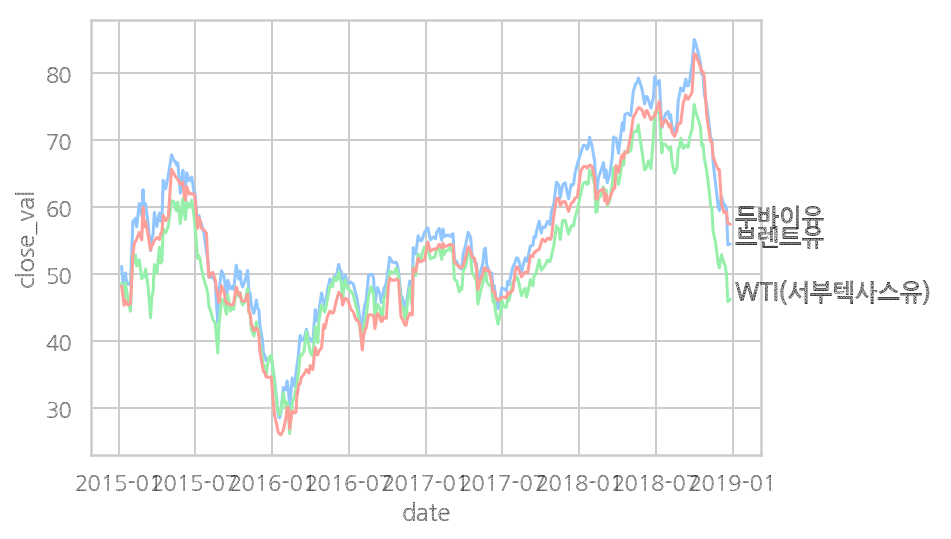

국제 금(COM@GC)
skewness : -0.47091208479140567
kurtosis : -0.28710572522755085
은(COM@SI)
skewness : 0.33515658889737415
kurtosis : 0.06387974574128874
팔라듐(NYM@PA)
skewness : 0.22619217518892742
kurtosis : -0.8742654389263262
백금(NYM@PL)
skewness : 0.6172025603090334
kurtosis : 0.18396461964090616


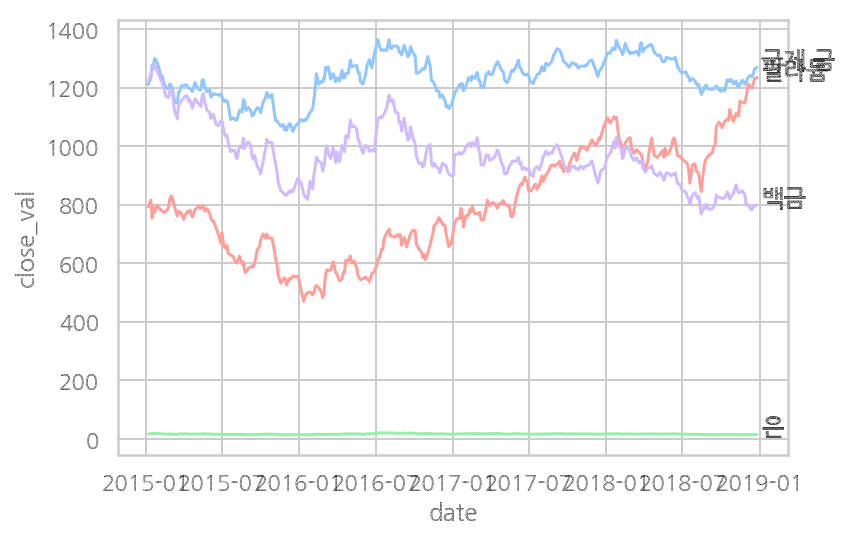

대두유(CBT$BO)
skewness : -0.2385386879470837
kurtosis : -0.4516266359022114
옥수수(CBT$C)
skewness : 0.35270687188627337
kurtosis : 0.46439794779731036
쌀(CBT$RR)
skewness : 0.10661183039099299
kurtosis : -1.0003803707040528
대두(CBT$S)
skewness : 0.14880125893087
kurtosis : -0.29773292513769123
대두박(CBT$SM)
skewness : 0.5570704953562924
kurtosis : 0.2963984590652129
소맥(CBT$W)
skewness : 0.1181894542087046
kurtosis : -0.6167648072251111
알루미늄합금(LME@AAY)
skewness : -0.2368071398610682
kurtosis : -0.4266257425109332
구리(LME@CDY)
skewness : 0.0007422593444192196
kurtosis : -1.0634160424500287
니켈(LME@NDY)
skewness : 0.3236473816169406
kurtosis : -0.9569948296702417
납(LME@PDY)
skewness : 0.2538172146495171
kurtosis : -1.22723197777784
주석(LME@SDY)
skewness : -0.5357072765403734
kurtosis : -0.9256519711510651
아연(LME@ZDY)
skewness : 0.099665333103946
kurtosis : -0.9905219815671842
설탕(NYB@SB)
skewness : 0.8943255723361463
kurtosis : -0.07327511023004529
난방유(NYM@HO)
skewness : 0.000662462948427786
kurtosis

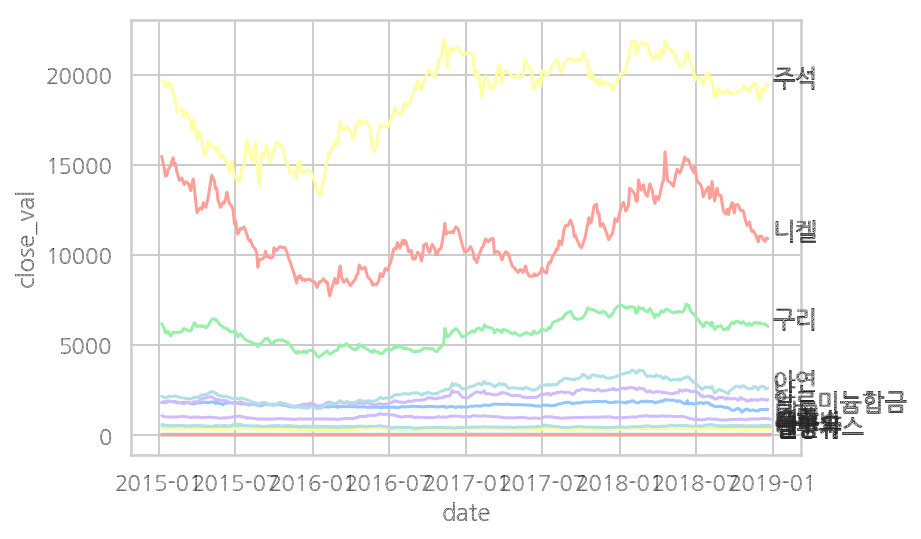

In [412]:
#전체, 1개월, 3개월, 6개월, 1년 으로 묶어 skewness와 kurtosis를 확인해본다.
from scipy.stats import skew
from scipy.stats import kurtosis


for id, group in gOilForeign:
  getGraph(group,'close_val')
  skewVal = skew(group['close_val'])
  kurtosisVal = kurtosis(group['close_val'])
  print('skewness : {}'.format(skewVal))
  print('kurtosis : {}'.format(kurtosisVal))
  
plt.show()


for id, group in gGoldForeign:
  getGraph(group,'close_val')
  skewVal = skew(group['close_val'])
  kurtosisVal = kurtosis(group['close_val'])
  print('skewness : {}'.format(skewVal))
  print('kurtosis : {}'.format(kurtosisVal))
  
plt.show()

for id, group in gGoodsForeign:
  getGraph(group,'close_val')
  skewVal = skew(group['close_val'])
  kurtosisVal = kurtosis(group['close_val'])
  print('skewness : {}'.format(skewVal))
  print('kurtosis : {}'.format(kurtosisVal))
  
plt.show()


In [0]:
from scipy.stats import skew
from scipy.stats import kurtosis


def getSkewKurtosis(df,colName):
  dummy=df[colName]
  return skew(dummy),kurtosis(dummy)

#groupby된 dataframe에서 가장 크고 작은 Skewness,Kurtosis의 이름을 출력하고 반환한다.
#시간대별로 1개월,3개월,6개월,1년단위로 잘라서 넣어봐도 괜찮을 것 같다.

#return dict(key:name, value:[skewness,kurtosis]) type
def getDictSkewKurtosis(groupdf,colName):
  skDict = {}  
  for id, group in groupdf:
    skewVal=0
    kurtosisVal = 0
    skewVal,kurtosisVal = getSkewKurtosis(group,colName)
    itemname = getItemNames(group)[0]
    skDict[itemname]=[skewVal,kurtosisVal]
  
  return skDict


def getMaxMinVal(dic,index):
  valueList=[]
  
  for key,value in dic.items():
    if index==0:
      print('{}의 왜도(skewness)는 {}'.format(key,value[index]))
    elif index==1:
      print('{}의 첨도(kurtosis)는 {}'.format(key,value[index]))
    
    valueList.append(value[index])
  maxVal=max(valueList)
  minVal=min(valueList)
  print(maxVal,minVal)
  return maxVal,minVal
  

def analysisDict(dic):
  skewHigh,skewLow = getMaxMinVal(dic,0)
  kurtosisHigh, kurtosisLow = getMaxMinVal(dic,1)
  
  print()
  print('{} 중에서 평가합니다. '.format(list(dic.keys())))
  print('')
  if skewHigh>0 and skewLow>0:
    print('해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.')
  elif skewHigh<0 and skewLow<0:
    print('해당 데이터들은 모두 우측으로 데이터 분포가 치우쳐져 있습니다.')
  else :
    print('해당 데이터들은 왜도(skewness)의 특징이 모두 같지는 않습니다.')
    
  if kurtosisHigh<3 and kurtosisLow<3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.')
  elif kurtosisHigh>3 and kurtosisLow>3:
    print('해당 데이터들은 모두 정규분포보다 데이터 분포가 중앙에 집중 되어 있습니다.')
  else :
    print('해당 데이터들은 첨도(kurtosis)의 특징이 모두 같지는 않습니다')
  
  
  print('max Skewness value은 이고, min Skewness value은 {} 입니다'.format(skewHigh,skewLow))
  print('max kurtosis value은 이고, min kurtosis value은 {} 입니다'.format(kurtosisHigh,kurtosisLow))
  print()

In [550]:
dic1 = getDictSkewKurtosis(gOilForeign,'close_val')
dic2 = getDictSkewKurtosis(gGoldForeign,'close_val')
dic3 = getDictSkewKurtosis(gGoodsForeign,'close_val')

analysisDict(dic1)
analysisDict(dic2)
analysisDict(dic3)

브렌트유의 왜도(skewness)는 0.2810707721027385
WTI(서부텍사스유) 의 왜도(skewness)는 0.230490799933492
두바이유의 왜도(skewness)는 0.16060428525459722
0.2810707721027385 0.16060428525459722
브렌트유의 첨도(kurtosis)는 -0.3744093901243071
WTI(서부텍사스유) 의 첨도(kurtosis)는 -0.28367436245456146
두바이유의 첨도(kurtosis)는 -0.36897950786282996
-0.28367436245456146 -0.3744093901243071

['브렌트유', 'WTI(서부텍사스유) ', '두바이유'] 중에서 평가합니다. 

해당 데이터들은 모두 좌측으로 데이터가 치우져있습니다.
해당 데이터들은 모두 정규분포보다 데이터 분포가 퍼져 있습니다.
max Skewness value은 이고, min Skewness value은 0.2810707721027385 입니다
max kurtosis value은 이고, min kurtosis value은 -0.28367436245456146 입니다

국제 금의 왜도(skewness)는 -0.47091208479140567
은의 왜도(skewness)는 0.33515658889737415
팔라듐의 왜도(skewness)는 0.22619217518892742
백금의 왜도(skewness)는 0.6172025603090334
0.6172025603090334 -0.47091208479140567
국제 금의 첨도(kurtosis)는 -0.28710572522755085
은의 첨도(kurtosis)는 0.06387974574128874
팔라듐의 첨도(kurtosis)는 -0.8742654389263262
백금의 첨도(kurtosis)는 0.18396461964090616
0.18396461964090616 -0.8742654389263262

['국제 금', '은', '팔라듐', '백금

### 위의 결과에서 브렌트유가 유가중 데이터의 변화가 가장 많았다고 볼 수 있다. 

### 1. 왜도가 양수형태를 띄며 가장 높다.
이는 데이터가 좌측으로 치우쳤음을 의미하고 가격이 가장 높은 지점까지 상승했음을 의미한다. 

### 2. 첨도가 
